In [1]:
#file for developing functions and other code

In [4]:
data_dir = "data/raw_training/training_data"

In [69]:
import librosa
import numpy as np

#PURPOSE:   load the spectrogram of a .wav audio file
#PARAMS:    wav_file            str     path to the wav file
#           sample_rate         int     sample rate of the wav file
#           print_spectrogram   Bool    [OPTIONAL] print the spectrogram: True OR False, default=False
#           title               str     [OPTIONAL] (if print_spectro=True) title of the printed spectrogram: str, default=None
#           y_type              str     [OPTIONAL] (if print_spectro=True) scale to use for the y axis: 'log' OR 'linear', default='log'
#RETURN:    ndarray     spectrogram of the wav file
def wav_to_spectro(wav_file, sample_rate, print_spectrogram=False, title=None, y_type='log'):
    waveform, sr = librosa.load(wav_file, sr=sample_rate)
    x = librosa.stft(waveform)  #STFT of waveform
    x_db = librosa.amplitude_to_db(np.abs(x))   #map the magnitudes of x to a decibel scale

    if print_spectrogram:
        print_spectro(x_db, sample_rate, title = title, y_type=y_type)

    return x_db

In [60]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

#PURPOSE:   print a spectrogram
#PARAMS:    spectrogram     ndarray     spectrogram to print
#           sample_rate     int         sample rate of the wav file
#           title           str         [OPTIONAL] title of the printed spectrogram: str, default=None
#           y_type          str         [OPTIONAL] scale to use for the y axis: 'log' OR 'linear', default='log'
def print_spectro(spectrogram, sample_rate, title=None, y_type='log'):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis=y_type, ax=ax)
    if not title==None:
        ax.set(title=title)
    fig.colorbar(img, ax=ax)
    

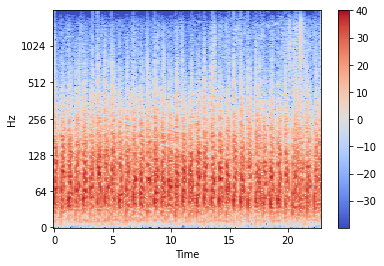

In [71]:
example = data_dir + "/9979_TV.wav"
spectrogram = wav_to_spectro(example, 4000, print_spectrogram=True)

c:\Users\HP User\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


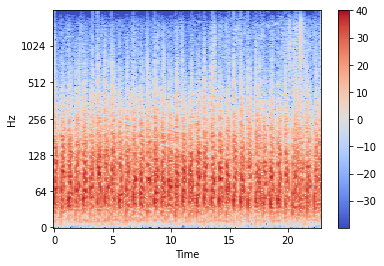

In [72]:
import helpers.audio_tools as adt

example = data_dir + "/9979_TV.wav"
spectrogram = adt.wav_to_spectro(example, 4000, print_spectrogram=True)